In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import pandas as pd

df = pd.read_csv("/content/cleaned_fraud_dataset.csv")

print(df.head())

   TRN_STATUS   AMOUNT  RESPONSE_CODE  BENEFICIARY_CODE  INITIATION_MODE  day  \
0           0      1.0              0                 0                0    1   
1           0    250.0              0                 0                0    1   
2           0    500.0              0                 0                0    2   
3           0  10000.0              0                 0                0    3   
4           0  10000.0              0                 0                0    5   

   month  year  hour  minute  ...  PAYER_IFSC_ENC  PAYER_ACCOUNT_ENC  \
0      3  2025    13      51  ...               0                  0   
1      3  2025    22      10  ...               1                  1   
2      3  2025    16      46  ...               1                  1   
3      3  2025    12      53  ...               2                  2   
4      3  2025    22       5  ...               2                  2   

   BENEFICIARY_VPA_ENC  BENEFICIARY_IFSC_ENC  BENEFICIARY_ACCOUNT_ENC  \
0      

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRN_STATUS               2804 non-null   int64  
 1   AMOUNT                   2804 non-null   float64
 2   RESPONSE_CODE            2804 non-null   int64  
 3   BENEFICIARY_CODE         2804 non-null   int64  
 4   INITIATION_MODE          2804 non-null   int64  
 5   day                      2804 non-null   int64  
 6   month                    2804 non-null   int64  
 7   year                     2804 non-null   int64  
 8   hour                     2804 non-null   int64  
 9   minute                   2804 non-null   int64  
 10  weekday                  2804 non-null   int64  
 11  TRANSACTION_TYPE_ENC     2804 non-null   int64  
 12  PAYER_VPA_ENC            2804 non-null   int64  
 13  PAYER_IFSC_ENC           2804 non-null   int64  
 14  PAYER_ACCOUNT_ENC       

In [47]:
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 2804, Columns: 23


In [48]:
print(df.isnull().sum())

TRN_STATUS                 0
AMOUNT                     0
RESPONSE_CODE              0
BENEFICIARY_CODE           0
INITIATION_MODE            0
day                        0
month                      0
year                       0
hour                       0
minute                     0
weekday                    0
TRANSACTION_TYPE_ENC       0
PAYER_VPA_ENC              0
PAYER_IFSC_ENC             0
PAYER_ACCOUNT_ENC          0
BENEFICIARY_VPA_ENC        0
BENEFICIARY_IFSC_ENC       0
BENEFICIARY_ACCOUNT_ENC    0
DEVICE_ID_ENC              0
IP_ADDRESS_ENC             0
LATITUDE_ENC               0
LONGITUDE_ENC              0
IS_FRAUD                   0
dtype: int64


In [49]:
corr_matrix = df.corr()

In [50]:
print(corr_matrix['IS_FRAUD'].sort_values(ascending=False).head(21))

IS_FRAUD                   1.000000
AMOUNT                     0.236913
day                        0.145505
BENEFICIARY_ACCOUNT_ENC    0.103872
PAYER_ACCOUNT_ENC          0.099465
BENEFICIARY_IFSC_ENC       0.096646
PAYER_IFSC_ENC             0.086825
DEVICE_ID_ENC              0.029201
PAYER_VPA_ENC              0.014149
minute                     0.010100
IP_ADDRESS_ENC            -0.040277
LONGITUDE_ENC             -0.041263
weekday                   -0.043705
LATITUDE_ENC              -0.063932
BENEFICIARY_VPA_ENC       -0.078389
INITIATION_MODE           -0.080744
hour                      -0.091408
TRANSACTION_TYPE_ENC      -0.096187
BENEFICIARY_CODE          -0.108113
RESPONSE_CODE             -0.148617
TRN_STATUS                -0.201618
Name: IS_FRAUD, dtype: float64


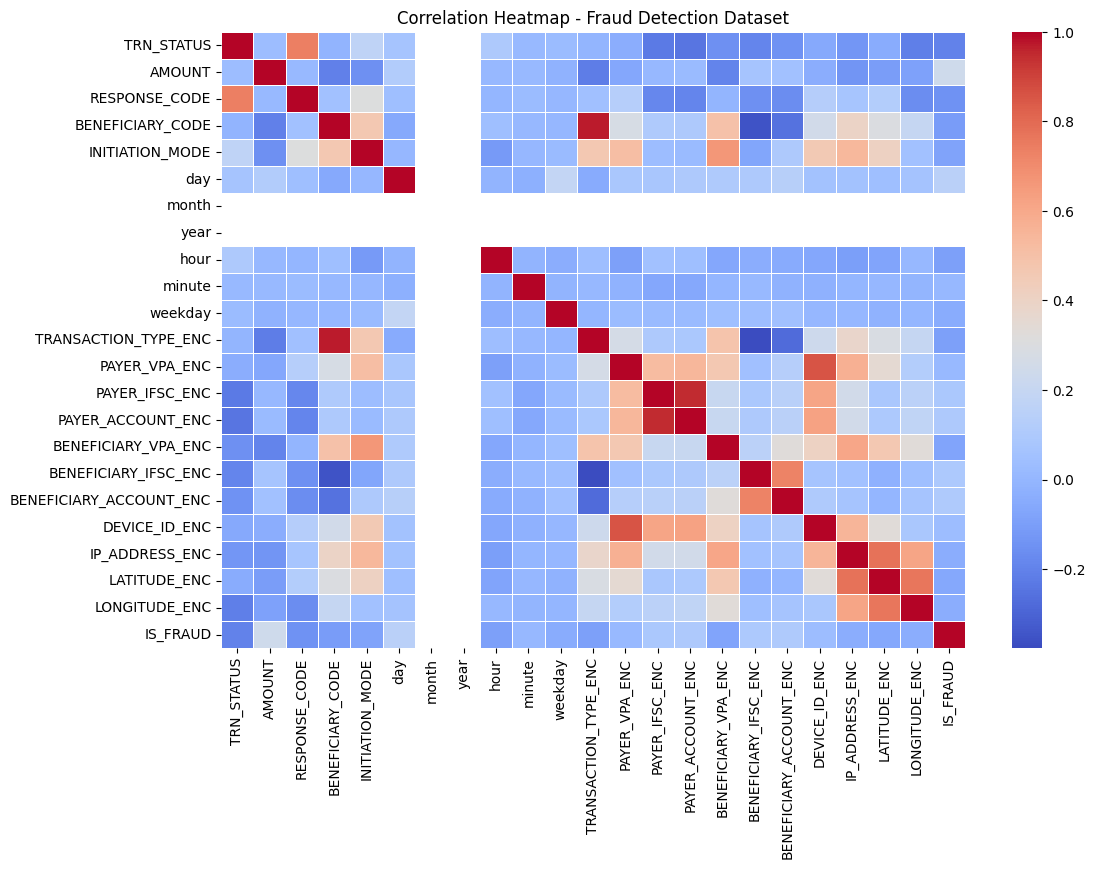

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap - Fraud Detection Dataset")
plt.show()

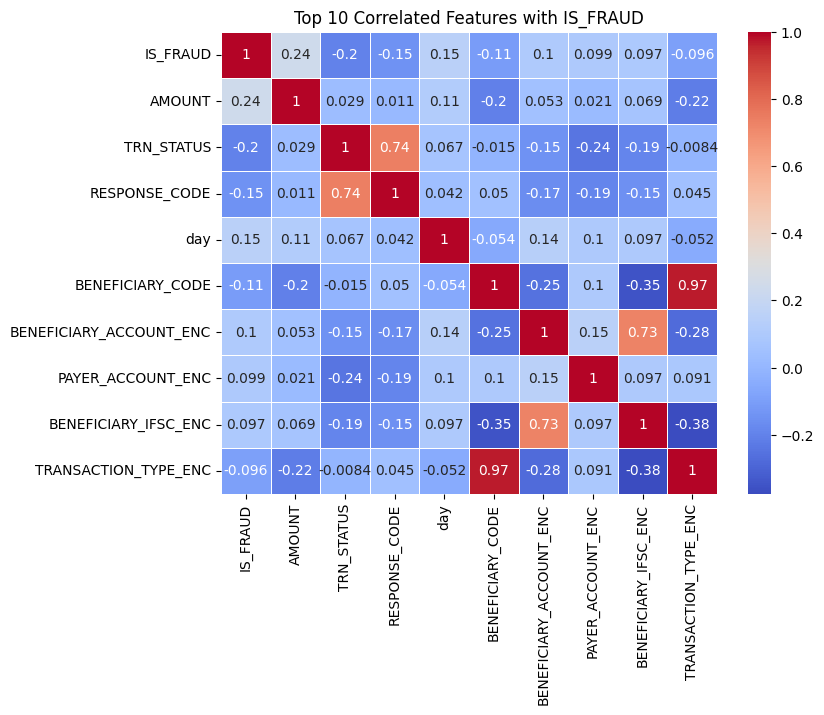

In [52]:
top_corr_features = corr_matrix['IS_FRAUD'].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Top 10 Correlated Features with IS_FRAUD")
plt.show()

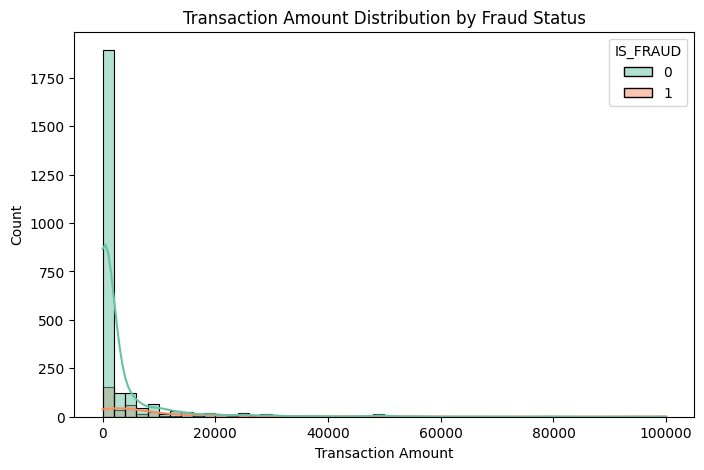

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='AMOUNT', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

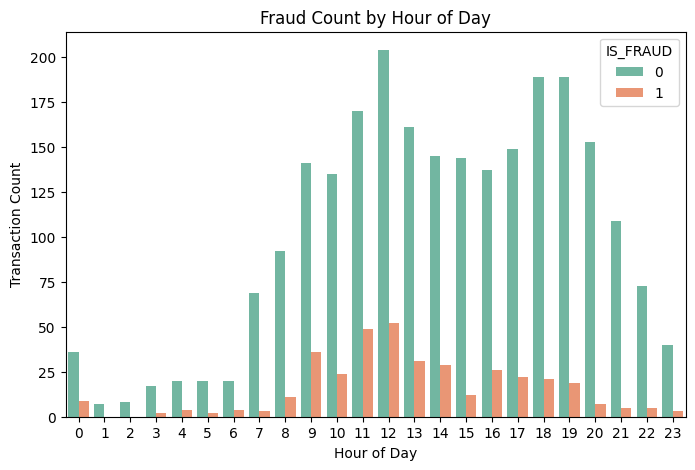

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='hour', hue='IS_FRAUD', data=df, palette='Set2')
plt.title("Fraud Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()

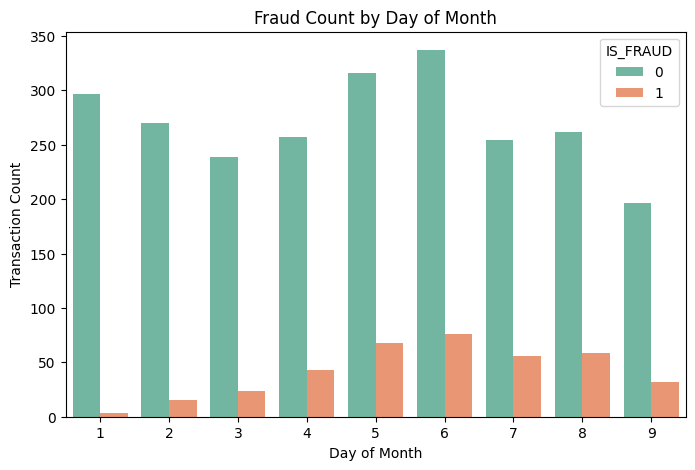

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='day', hue='IS_FRAUD', data=df, palette='Set2')
plt.title("Fraud Count by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Transaction Count")
plt.show()

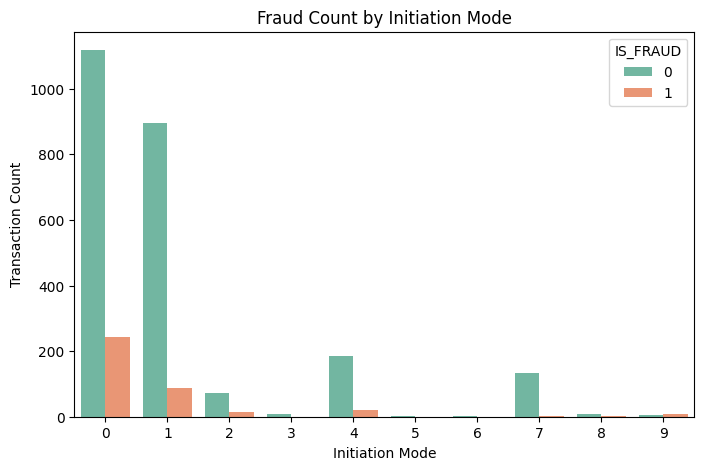

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='INITIATION_MODE', hue='IS_FRAUD', data=df, palette='Set2')
plt.title("Fraud Count by Initiation Mode")
plt.xlabel("Initiation Mode")
plt.ylabel("Transaction Count")
plt.show()


In [57]:
for feature in ['hour', 'day', 'INITIATION_MODE']:
    fraud_rate = df.groupby(feature)['IS_FRAUD'].mean() * 100
    print(f"\n🔹 Fraud Percentage by {feature}:")
    print(fraud_rate.sort_values(ascending=False).head(10))


🔹 Fraud Percentage by hour:
hour
11    22.374429
9     20.338983
12    20.312500
0     20.000000
14    16.666667
4     16.666667
6     16.666667
13    16.145833
16    15.950920
10    15.094340
Name: IS_FRAUD, dtype: float64

🔹 Fraud Percentage by day:
day
6    18.401937
8    18.380062
7    18.064516
5    17.708333
4    14.333333
9    14.035088
3     9.125475
2     5.263158
1     1.000000
Name: IS_FRAUD, dtype: float64

🔹 Fraud Percentage by INITIATION_MODE:
INITIATION_MODE
9    63.636364
0    17.914831
2    15.116279
8    10.000000
4     9.708738
1     9.044715
7     1.481481
3     0.000000
5     0.000000
6     0.000000
Name: IS_FRAUD, dtype: float64


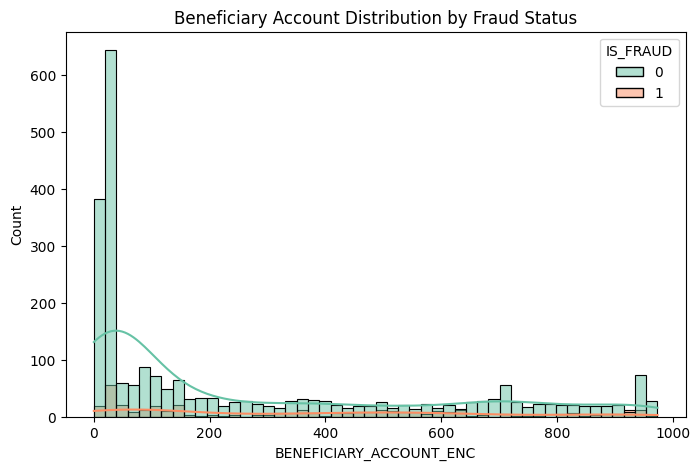

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='BENEFICIARY_ACCOUNT_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Beneficiary Account Distribution by Fraud Status")
plt.xlabel("BENEFICIARY_ACCOUNT_ENC")
plt.ylabel("Count")
plt.show()


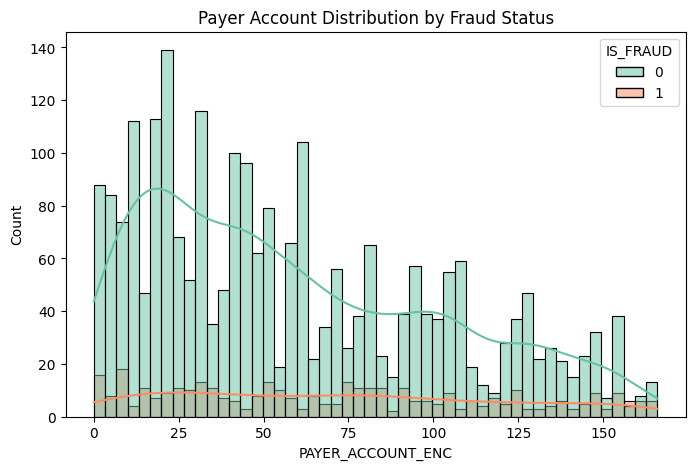

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='PAYER_ACCOUNT_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Payer Account Distribution by Fraud Status")
plt.xlabel("PAYER_ACCOUNT_ENC")
plt.ylabel("Count")
plt.show()


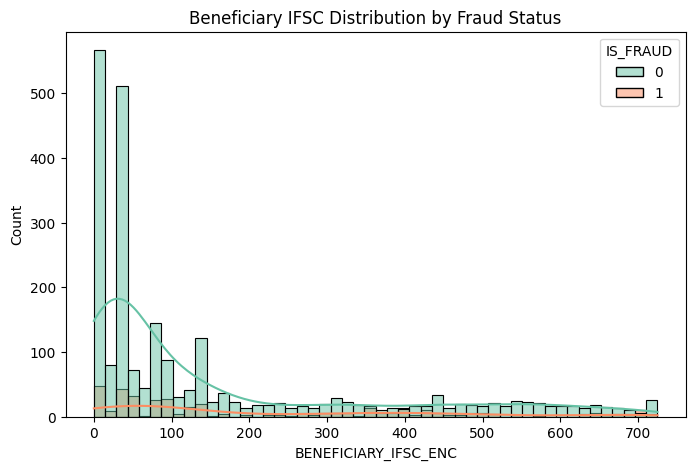

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='BENEFICIARY_IFSC_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Beneficiary IFSC Distribution by Fraud Status")
plt.xlabel("BENEFICIARY_IFSC_ENC")
plt.ylabel("Count")
plt.show()


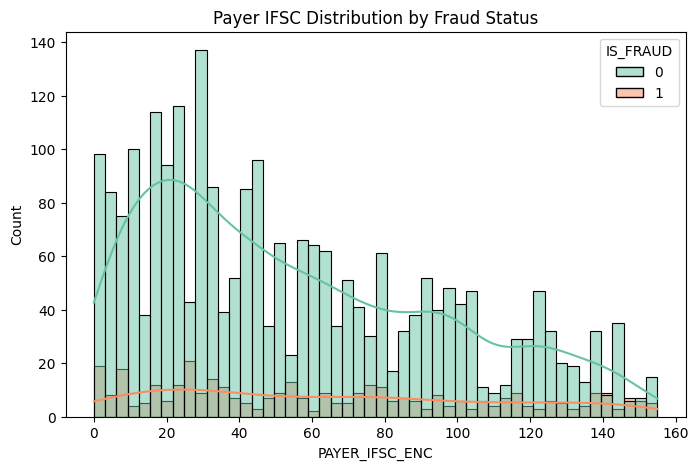

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='PAYER_IFSC_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Payer IFSC Distribution by Fraud Status")
plt.xlabel("PAYER_IFSC_ENC")
plt.ylabel("Count")
plt.show()


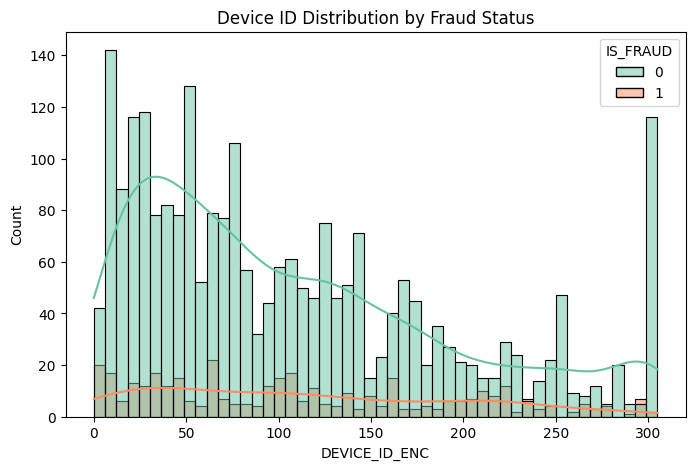

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='DEVICE_ID_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Device ID Distribution by Fraud Status")
plt.xlabel("DEVICE_ID_ENC")
plt.ylabel("Count")
plt.show()


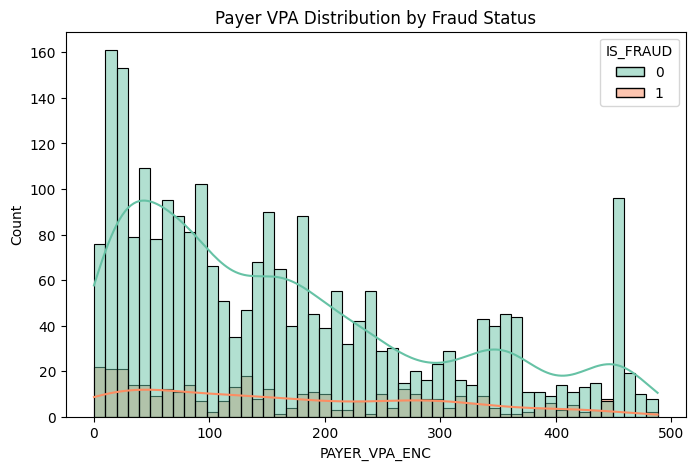

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='PAYER_VPA_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Payer VPA Distribution by Fraud Status")
plt.xlabel("PAYER_VPA_ENC")
plt.ylabel("Count")
plt.show()


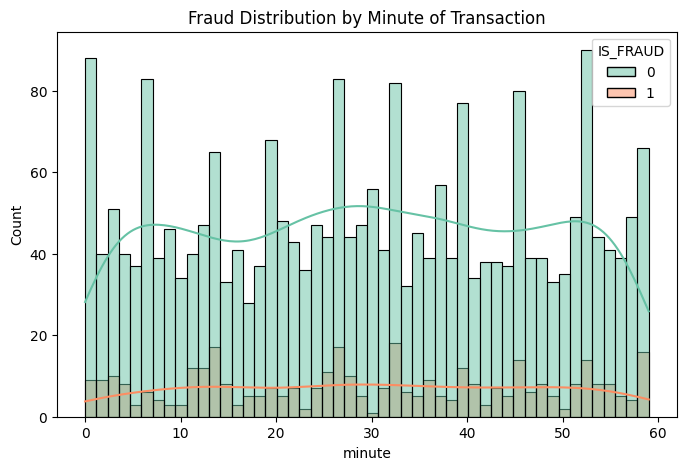

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='minute', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Fraud Distribution by Minute of Transaction")
plt.xlabel("minute")
plt.ylabel("Count")
plt.show()


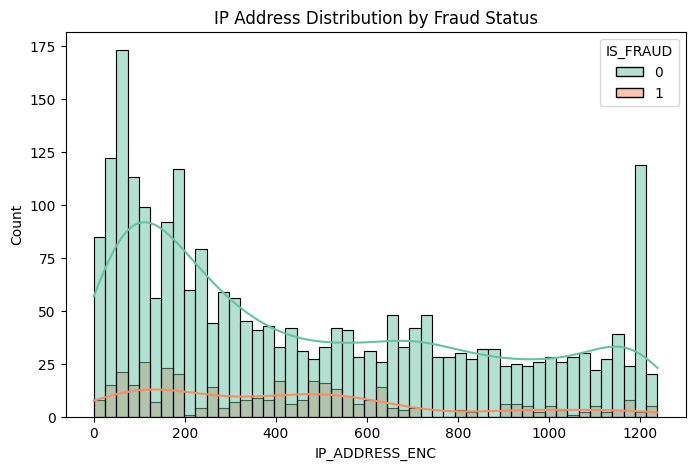

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='IP_ADDRESS_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("IP Address Distribution by Fraud Status")
plt.xlabel("IP_ADDRESS_ENC")
plt.ylabel("Count")
plt.show()


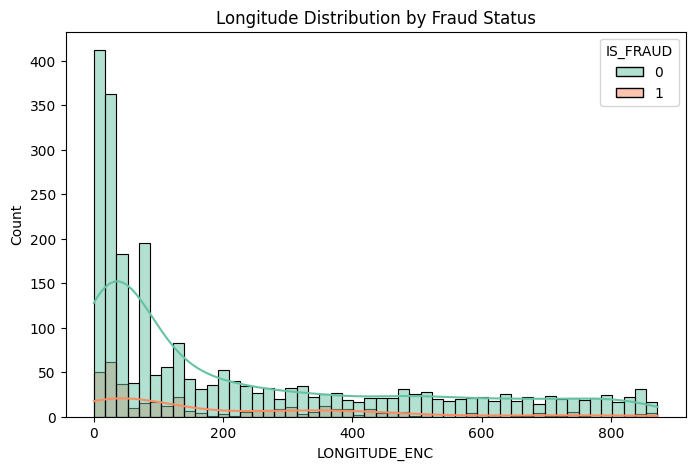

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='LONGITUDE_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Longitude Distribution by Fraud Status")
plt.xlabel("LONGITUDE_ENC")
plt.ylabel("Count")
plt.show()


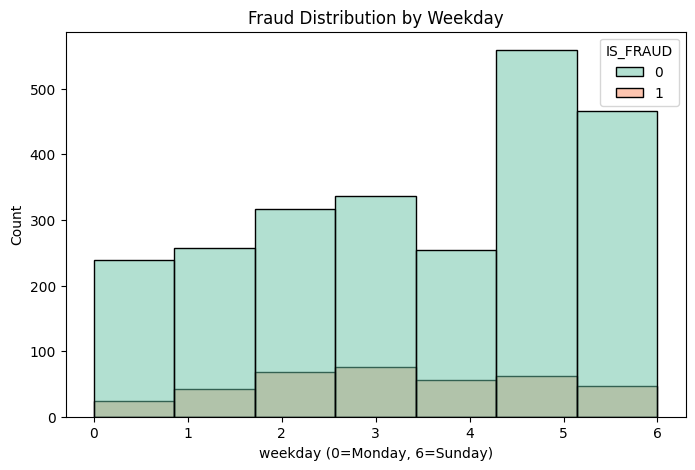

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='weekday', hue='IS_FRAUD', bins=7, kde=False, palette='Set2')
plt.title("Fraud Distribution by Weekday")
plt.xlabel("weekday (0=Monday, 6=Sunday)")
plt.ylabel("Count")
plt.show()


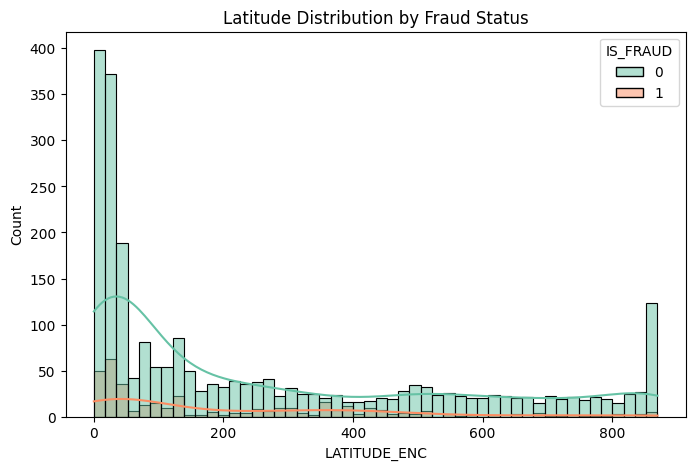

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='LATITUDE_ENC', hue='IS_FRAUD', bins=50, kde=True, palette='Set2')
plt.title("Latitude Distribution by Fraud Status")
plt.xlabel("LATITUDE_ENC")
plt.ylabel("Count")
plt.show()


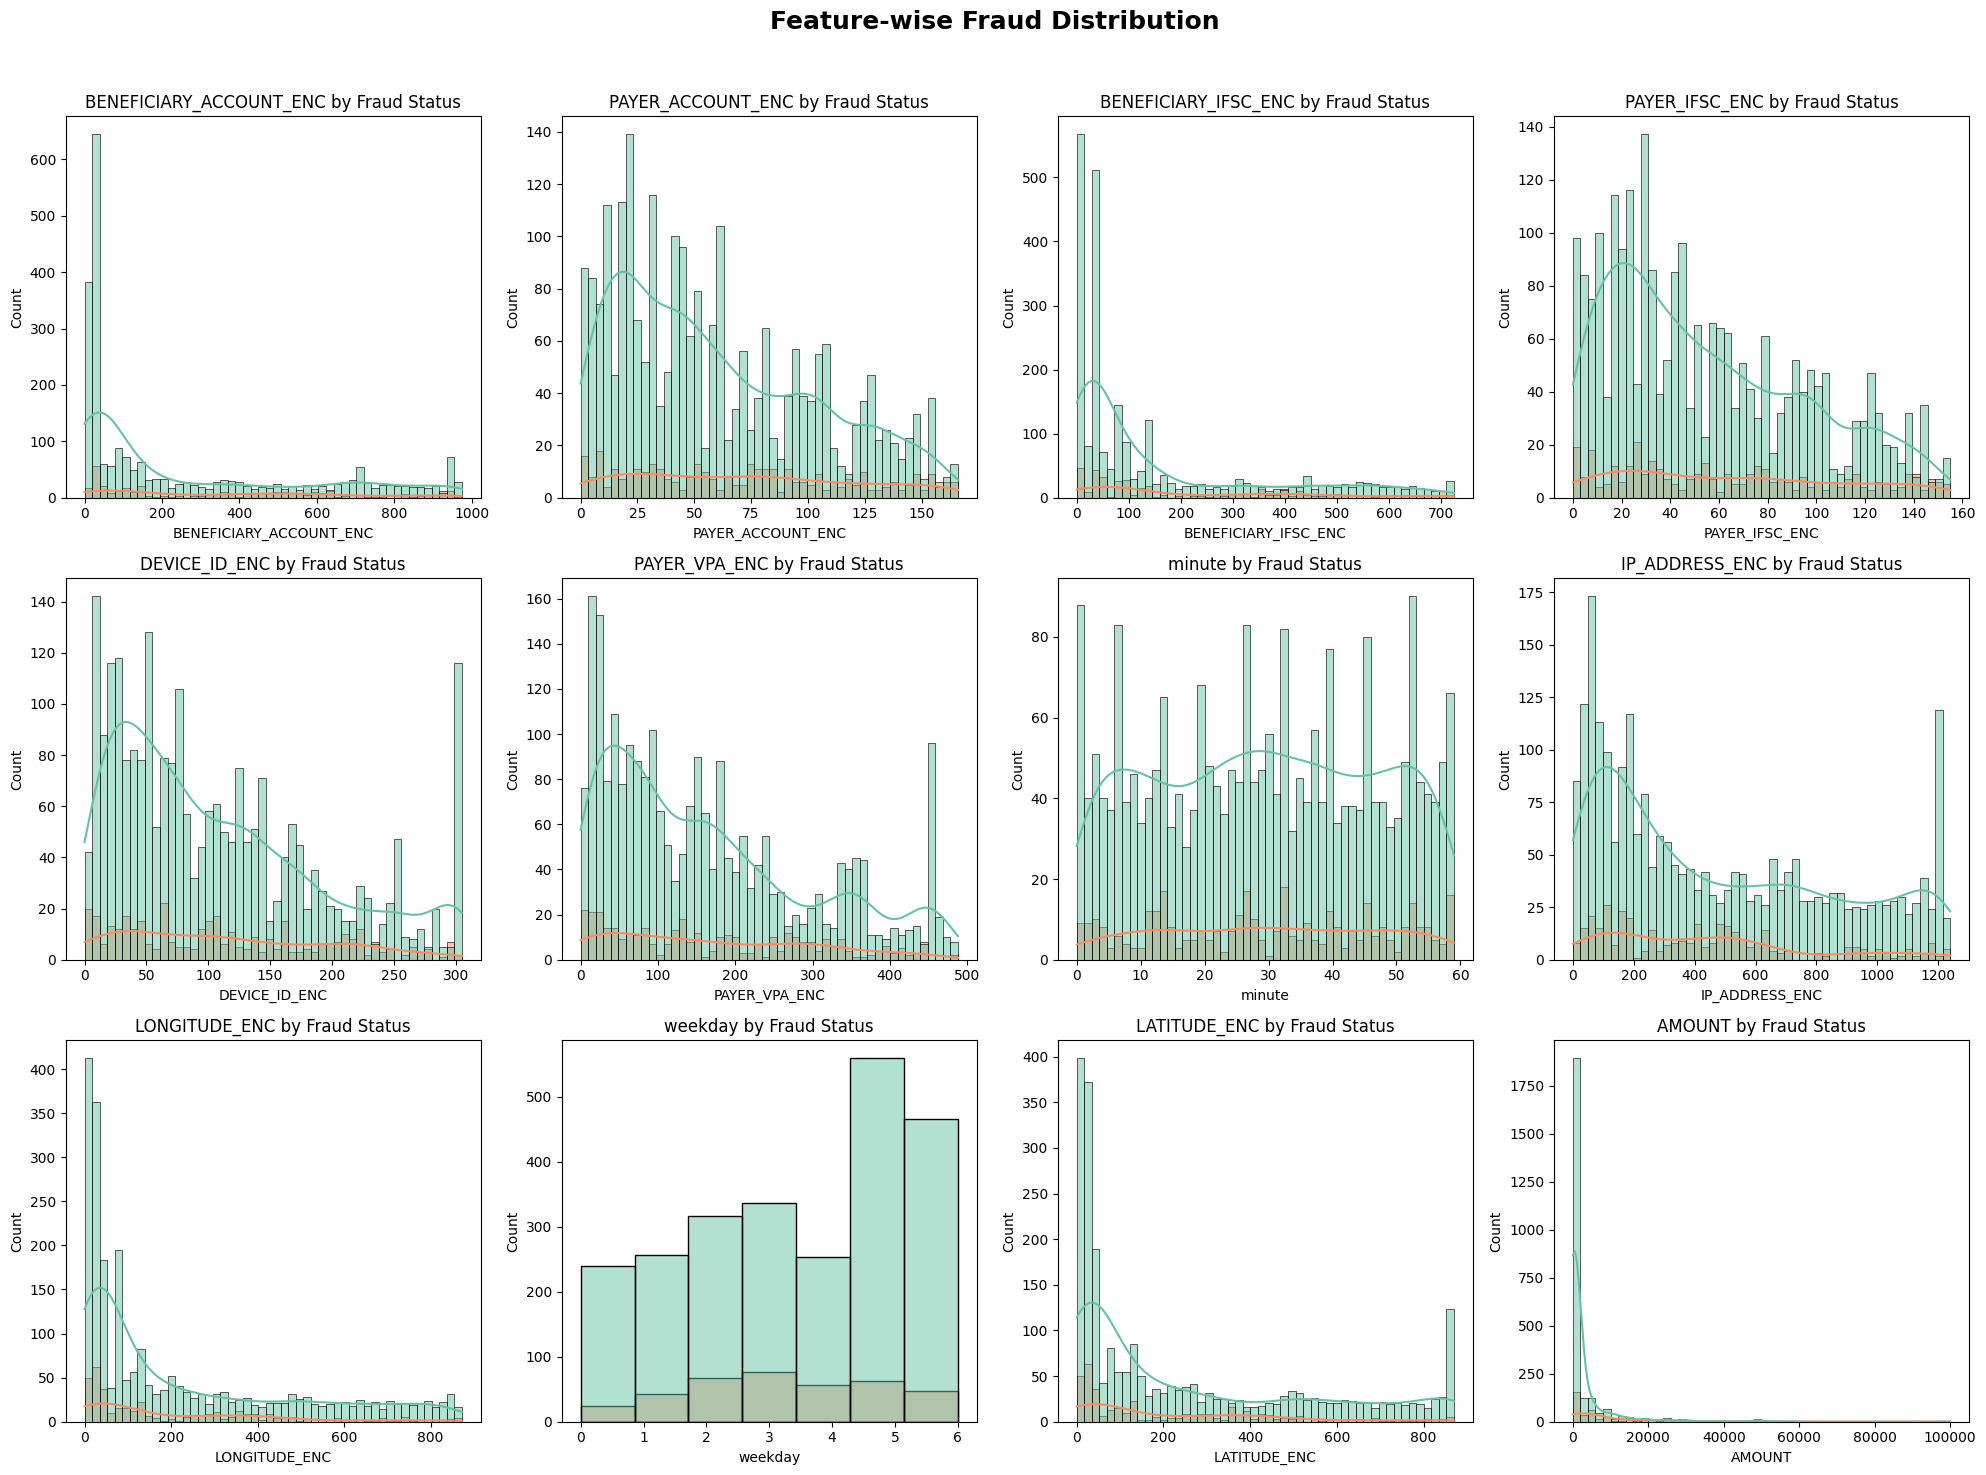

In [69]:

features = [
    'BENEFICIARY_ACCOUNT_ENC', 'PAYER_ACCOUNT_ENC', 'BENEFICIARY_IFSC_ENC', 'PAYER_IFSC_ENC',
    'DEVICE_ID_ENC', 'PAYER_VPA_ENC', 'minute', 'IP_ADDRESS_ENC',
    'LONGITUDE_ENC', 'weekday', 'LATITUDE_ENC','AMOUNT'
]


plt.figure(figsize=(20, 15))
plt.suptitle("Feature-wise Fraud Distribution", fontsize=18, fontweight='bold')


for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    bins = 7 if feature == 'weekday' else 50
    kde = False if feature == 'weekday' else True

    sns.histplot(
        data=df, x=feature, hue='IS_FRAUD',
        bins=bins, kde=kde, palette='Set2', legend=False
    )

    plt.title(f"{feature} by Fraud Status", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRN_STATUS               2804 non-null   int64  
 1   AMOUNT                   2804 non-null   float64
 2   RESPONSE_CODE            2804 non-null   int64  
 3   BENEFICIARY_CODE         2804 non-null   int64  
 4   INITIATION_MODE          2804 non-null   int64  
 5   day                      2804 non-null   int64  
 6   month                    2804 non-null   int64  
 7   year                     2804 non-null   int64  
 8   hour                     2804 non-null   int64  
 9   minute                   2804 non-null   int64  
 10  weekday                  2804 non-null   int64  
 11  TRANSACTION_TYPE_ENC     2804 non-null   int64  
 12  PAYER_VPA_ENC            2804 non-null   int64  
 13  PAYER_IFSC_ENC           2804 non-null   int64  
 14  PAYER_ACCOUNT_ENC       

In [70]:

X = df.drop(columns=['IS_FRAUD']).values
y = df['IS_FRAUD'].values


X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [71]:
import numpy as np

In [72]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.theta) + self.bias
            y_pred = self.sigmoid(linear_model)

            error = y_pred - y
            d_theta = np.dot(X.T, error) / len(y)
            d_bias = np.sum(error) / len(y)

            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.theta) + self.bias)
        return np.where(y_pred >= 0.5, 1, 0)


In [73]:
# Train
log_reg = LogisticRegressionScratch(lr=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

acc_log = np.mean(y_pred_log == y_test)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")


Logistic Regression Accuracy: 0.7736


In [74]:
class NaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-6
            self.priors[c] = len(X_c) / len(X)

    def pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                class_conditional = np.sum(np.log(self.pdf(c, x)))
                posterior = prior + class_conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)


In [75]:
nb = NaiveBayesScratch()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
acc_nb = np.mean(y_pred_nb == y_test)

print(f"Naive Bayes Accuracy: {acc_nb:.4f}")


Naive Bayes Accuracy: 0.6506


/tmp/ipython-input-3093304008.py:27: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(c, x)))


In [76]:
print("\nModel Performance Comparison:")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Naive Bayes Accuracy:        {acc_nb:.4f}")



Model Performance Comparison:
Logistic Regression Accuracy: 0.7736
Naive Bayes Accuracy:        0.6506


In [77]:


def confusion_matrix_scratch(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN


def metrics_report(y_true, y_pred, model_name="Model"):
    TP, TN, FP, FN = confusion_matrix_scratch(y_true, y_pred)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)

    print(f"\n {model_name} Evaluation Report")

    print(f"Confusion Matrix:")
    print(f"TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")

    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1_score:.4f}")


    return accuracy, precision, recall, f1_score


In [78]:

metrics_report(y_test, y_pred_log, model_name="Logistic Regression")

metrics_report(y_test, y_pred_nb, model_name="Naive Bayes")



 Logistic Regression Evaluation Report
Confusion Matrix:
TP = 25, TN = 409, FP = 101, FN = 26
Accuracy : 0.7736
Precision: 0.1984
Recall   : 0.4902
F1 Score : 0.2825

 Naive Bayes Evaluation Report
Confusion Matrix:
TP = 31, TN = 334, FP = 176, FN = 20
Accuracy : 0.6506
Precision: 0.1498
Recall   : 0.6078
F1 Score : 0.2403


(np.float64(0.6506238859180036),
 np.float64(0.14975845409904548),
 np.float64(0.607843137135717),
 np.float64(0.24031007432876633))